In [1]:
# Modules 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# File to path
file_to_load = "clean_df.csv"

# Read files
data_df = pd.read_csv(file_to_load)

#print cleaned data 
data_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False


In [2]:
data_df.columns

Index(['Unnamed: 0', 'station_id', 'stationname', 'date', 'daytype', 'rides',
       'Blackhawks', 'Cubs', 'Bulls', 'Bears', 'White Sox'],
      dtype='object')

In [3]:
# Adding a column for year
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['year'] = data_df['date'].dt.year
data_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,year
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False,2017
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False,2017
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False,2017
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False,2017
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False,2020
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False,2020
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False,2020
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False,2020


In [4]:
#creating df for only the Roosevelt Stop

roosevelt_df = data_df.loc[data_df['station_id'] == 41400]
roosevelt_df.dtypes

Unnamed: 0              int64
station_id              int64
stationname            object
date           datetime64[ns]
daytype                object
rides                   int64
Blackhawks               bool
Cubs                     bool
Bulls                    bool
Bears                    bool
White Sox                bool
year                    int64
dtype: object

In [5]:
roosevelt_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,year
83,83,41400,Roosevelt,2017-12-31,U,4775,False,False,True,False,False,2017
197,197,41400,Roosevelt,2017-12-27,W,6404,False,False,True,False,False,2017
356,356,41400,Roosevelt,2017-12-14,W,10434,False,False,False,False,False,2017
432,432,41400,Roosevelt,2017-12-09,A,7331,False,False,True,False,False,2017
611,611,41400,Roosevelt,2017-12-18,W,9385,False,False,True,False,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
196227,1027585,41400,Roosevelt,2020-09-26,A,2907,False,False,False,False,False,2020
196228,1027586,41400,Roosevelt,2020-09-27,U,2158,False,False,False,False,False,2020
196229,1027587,41400,Roosevelt,2020-09-28,W,3025,False,False,False,False,False,2020
196230,1027588,41400,Roosevelt,2020-09-29,W,3013,False,False,False,False,False,2020


In [6]:
#removing 2020 data as it is pulling down average ridership for baseline estimate
pre_covid = roosevelt_df.loc[roosevelt_df['year']< 2020]

pre_covid

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,year
83,83,41400,Roosevelt,2017-12-31,U,4775,False,False,True,False,False,2017
197,197,41400,Roosevelt,2017-12-27,W,6404,False,False,True,False,False,2017
356,356,41400,Roosevelt,2017-12-14,W,10434,False,False,False,False,False,2017
432,432,41400,Roosevelt,2017-12-09,A,7331,False,False,True,False,False,2017
611,611,41400,Roosevelt,2017-12-18,W,9385,False,False,True,False,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
182227,990342,41400,Roosevelt,2017-02-12,U,7255,False,False,False,False,False,2017
182640,998228,41400,Roosevelt,2017-01-26,W,10453,False,False,False,False,False,2017
182699,999268,41400,Roosevelt,2017-02-26,U,6075,False,False,False,False,False,2017
183078,1006279,41400,Roosevelt,2017-04-16,U,5769,False,True,False,False,False,2017


In [7]:
#creating a non game day only from roosevelt df
nongame_day_df = pre_covid.loc[pre_covid['Bears'] == False]

nongame_day_df.head()

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,year
83,83,41400,Roosevelt,2017-12-31,U,4775,False,False,True,False,False,2017
197,197,41400,Roosevelt,2017-12-27,W,6404,False,False,True,False,False,2017
356,356,41400,Roosevelt,2017-12-14,W,10434,False,False,False,False,False,2017
432,432,41400,Roosevelt,2017-12-09,A,7331,False,False,True,False,False,2017
611,611,41400,Roosevelt,2017-12-18,W,9385,False,False,True,False,False,2017


In [8]:
# creating a game day only df from roosevelt df
bears_gameday_df = pre_covid.loc[pre_covid['Bears'] == True]

bears_gameday_df.head()

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,year
1515,1515,41400,Roosevelt,2017-12-24,U,7317,False,False,False,True,False,2017
2244,2244,41400,Roosevelt,2017-12-03,U,9972,True,False,False,True,False,2017
39090,39095,41400,Roosevelt,2018-08-25,A,11201,False,True,False,True,False,2018
39095,39100,41400,Roosevelt,2018-08-30,W,14000,False,False,False,True,True,2018
43418,43423,41400,Roosevelt,2018-09-17,W,14536,False,False,False,True,False,2018


In [13]:
#Non game day average ridership  Need nongame day avgs and game day avgs to get a bar chart

Non_gameday_avg = nongame_day_df['rides'].mean()

Weekday_non_df = nongame_day_df.loc[nongame_day_df['daytype'] =="W"]
weekday_non_avg = Weekday_non_df['rides'].mean()

Saturday_non_df = nongame_day_df.loc[nongame_day_df['daytype'] =="A"]
saturday_non_avg = Saturday_non_df['rides'].mean()

Sunday_non_df = nongame_day_df.loc[nongame_day_df['daytype'] =="U"]
sunday_non_avg = Sunday_non_df['rides'].mean()

In [14]:
# Game day average ridership - need both non game and game days avgs to get bar chart data

gameday_avg = bears_gameday_df['rides'].mean()

Weekday_gameday_df = bears_gameday_df[bears_gameday_df['daytype'] =="W"]
weekday_gameday_avg = Weekday_gameday_df['rides'].mean()

Saturday_gameday_df = bears_gameday_df[bears_gameday_df['daytype'] =="A"]
saturday_gameday_avg = Saturday_gameday_df['rides'].mean()

Sunday_gameday_df = bears_gameday_df[bears_gameday_df['daytype'] =="U"]
sunday_gameday_avg = Sunday_gameday_df['rides'].mean()

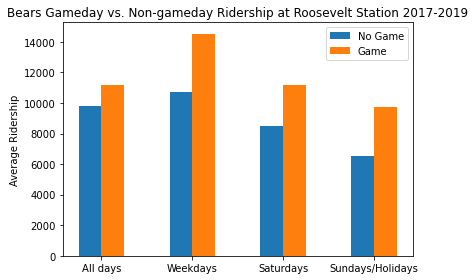

In [18]:
# Build out bar graph to compare game day and non game day averages based on day type - Konsta helped me with this

labels = ['All days', 'Weekdays', 'Saturdays', 'Sundays/Holidays']
nongameday_avgs = [Non_gameday_avg, weekday_non_avg, saturday_non_avg, sunday_non_avg]
gameday_avgs = [gameday_avg, weekday_gameday_avg, saturday_gameday_avg, sunday_gameday_avg]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nongameday_avgs, width, label='No Game')
rects2 = ax.bar(x + width/2, gameday_avgs, width, label='Game')

ax.set_ylabel('Average Ridership')
ax.set_title('Bears Gameday vs. Non-gameday Ridership at Roosevelt Station 2017-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
#trying a boxplot to see if it shows anything interesting

